<a href="https://colab.research.google.com/github/SergioaA64/SergioaA64/blob/main/TrabalhoD6_SAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TRABALHO D6 - ESTATÍSTICA DESCRITIVA
Nome: Sergio Affonso de Oliveira

Professor: Eduardo Monteiro de Castro Gomes


### Tema : Auxílio Emergencial da Cultura - Lei Aldir Blanc

O Auxílio emergencial da Cultura foi criado em junho de 2020 com o objetivo de auxiliar e apoiar profissionais do setor, estabelecimentos e iniciativas culturais durante a pandemia. O trabalho terá como ênfase as iniciativas culturais contempladas com o benefício.

Esse auxílio emergencial, de acordo com a Lei 14.017 de 29 de junho de 2020, pode ser executado três formas seguintes:

I - renda emergencial mensal aos trabalhadores e trabalhadoras da cultura;

II - subsídio mensal para manutenção de espaços artísticos e culturais, instituições e organizações culturais comunitárias que tiveram as suas atividades interrompidas por força das medidas de isolamento social; e

III - editais, chamadas públicas, prêmios, aquisição de bens e serviços vinculados ao setor cultural e outros instrumentos destinados à manutenção de agentes, de espaços, de iniciativas, de cursos, de produções, de desenvolvimento de atividades de economia criativa e de economia solidária, de produções audiovisuais, de manifestações culturais, bem como à realização de atividades artísticas e culturais que possam ser transmitidas pela internet ou disponibilizadas por meio de redes sociais e outras plataformas digitais.

Os recursos são executados de forma descentralizada, mediante transferências da União aos Estados, aos Municípios e ao Distrito Federal.

A participação dos Estados e municípios é eletiva: o Ente Federado deve se cadastrar e apresentar um plano de ação.

Fonte de dados: http://portalsnc.cultura.gov.br/indicadorescultura/ e
https://www.ibge.gov.br/


Este trabalho restringiu-se a apresentar aspectos gerais da política em execução, de forma a aplicar as técnicas de estatísticas transmitidas, e apresentar uma primeira análise desses dados, como:
- Valor transferido ao município por habitante;
- Panorama dos municípios cadastrados e não cadastrados;
- Correlação entre o IDHM e a participação no Programa do Auxílio Emergencial; e
- Teste de hipótese: se existe dependência entre a participação no Programa e o IDHM.

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Importção de dados com a população e IDHM de todos os municípios. Fonte IBGE
Informação da situação do Município em Relação à Lei Aldir Blanc

In [56]:
ibge = pd.read_csv("https://raw.githubusercontent.com/SergioaA64/SergioaA64/main/DADOS.csv", encoding = "iso8859_16", sep =";", decimal=",")

# ibge.head()
ibge

,COD_IBGE,COD_SIAFI,NOME_ENTE,NOME_SIMPLIFICADO,SIGLA_UF,NOME_UF,POP_EST_2020,CAPITAL,REGIAO,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE,SITUACAO
0,5200050,1050.0,Abadia de Goiás,ABADIA DE GOIAS,GO,Goiás,8958,0,CO,0.708,0.830,0.622,0.687,Năo Cadastrado
1,3100104,4001.0,Abadia dos Dourados,ABADIA DOS DOURADOS,MG,Minas Gerais,7006,0,SE,0.689,0.839,0.563,0.693,Aprovado
2,5200100,9201.0,Abadiânia,ABADIANIA,GO,Goiás,20461,0,CO,0.689,0.841,0.579,0.671,Năo Cadastrado
3,3100203,4003.0,Abaeté,ABAETE,MG,Minas Gerais,23250,0,SE,0.698,0.848,0.556,0.720,Aprovado
4,1500107,401.0,Abaetetuba,ABAETETUBA,PA,Pará,159080,0,N,0.628,0.798,0.537,0.579,Aprovado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,2933604,3971.0,Xique-Xique,XIQUE XIQUE,BA,Bahia,46523,0,NE,0.585,0.741,0.479,0.563,Aprovado
5566,2517407,542.0,Zabelê,ZABELE,PB,Paraíba,2255,0,NE,0.623,0.725,0.587,0.567,Aprovado
5567,3557154,2973.0,Zacarias,ZACARIAS,SP,Săo Paulo,2752,0,SE,0.729,0.826,0.674,0.695,Năo Cadastrado
5568,2114007,1287.0,Zé Doca,ZE DOCA,MA,Maranhăo,51956,0,NE,0.595,0.745,0.505,0.559,Năo Cadastrado


Importação de dados com a execução dos Municípios da Lei Aldir Blanc


In [57]:
execucao = pd.read_csv("https://raw.githubusercontent.com/SergioaA64/SergioaA64/main/EXECUCAO.csv", encoding = "iso8859_16", sep =";", na_values=0)


execucao


,UF,MUNICIPIOS,TRANSFERIDO,SALDO_CONTA,PORCENT_SALDO,PORCENT_EXECUTADO
0,MG,ABADIA DOS DOURADOS,65849.20,14.11,0.00021427747034132534,0.999786
1,MG,ABAETE,184561.08,20.15,0.0001091779480267454,0.999891
2,PA,ABAETETUBA,1135508.09,1.23,0.0000010832155321764373,0.999999
3,CE,ABAIARA,102603.05,103302.04,10.068.125.655.134.000,NaN
4,BA,ABAIRA,76839.48,NaN,NaN,1.000000
...,...,...,...,...,...,...
4144,PE,XEXEU,129070.44,7577.88,0.05871119676976386,0.941289
4145,PA,XINGUARA,323115.91,83705.09,0.25905592206833766,0.740944
4146,BA,XIQUE XIQUE,355168.07,82.88,0.0002333543102565498,0.999767
4147,PB,ZABELE,38501.21,11.93,0.00030986039140068586,0.999690


In [58]:
# Mesclar tabelas, criar novas colunas que serão importantes para a análise
# Notar que as tabelas têm diferentes números de registros, pois nem todos os municípios aderiram ao Programa.

dados = pd.merge(execucao, ibge, left_on='MUNICIPIOS', right_on='NOME_SIMPLIFICADO', how='inner')

dados['ValorMedioHab'] = dados['TRANSFERIDO'] / dados['POP_EST_2020']
dados.drop(['COD_SIAFI', 'NOME_ENTE'], inplace=True, axis=1)
dados


,UF,MUNICIPIOS,TRANSFERIDO,SALDO_CONTA,PORCENT_SALDO,PORCENT_EXECUTADO,COD_IBGE,NOME_SIMPLIFICADO,SIGLA_UF,NOME_UF,POP_EST_2020,CAPITAL,REGIAO,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE,SITUACAO,ValorMedioHab
0,MG,ABADIA DOS DOURADOS,65849.20,14.11,0.00021427747034132534,0.999786,3100104,ABADIA DOS DOURADOS,MG,Minas Gerais,7006,0,SE,0.689,0.839,0.563,0.693,Aprovado,9.398972
1,MG,ABAETE,184561.08,20.15,0.0001091779480267454,0.999891,3100203,ABAETE,MG,Minas Gerais,23250,0,SE,0.698,0.848,0.556,0.720,Aprovado,7.938111
2,PA,ABAETETUBA,1135508.09,1.23,0.0000010832155321764373,0.999999,1500107,ABAETETUBA,PA,Pará,159080,0,N,0.628,0.798,0.537,0.579,Aprovado,7.137969
3,CE,ABAIARA,102603.05,103302.04,10.068.125.655.134.000,NaN,2300101,ABAIARA,CE,Ceará,11853,0,NE,0.628,0.748,0.612,0.540,Aprovado,8.656294
4,BA,ABAIRA,76839.48,NaN,NaN,1.000000,2900108,ABAIRA,BA,Bahia,8710,0,NE,0.603,0.746,0.510,0.577,Aprovado,8.821984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4634,PE,XEXEU,129070.44,7577.88,0.05871119676976386,0.941289,2616506,XEXEU,PE,Pernambuco,14757,0,NE,0.552,0.703,0.436,0.549,Aprovado,8.746387
4635,PA,XINGUARA,323115.91,83705.09,0.25905592206833766,0.740944,1508407,XINGUARA,PA,Pará,45086,0,N,0.646,0.800,0.503,0.671,Aprovado,7.166657
4636,BA,XIQUE XIQUE,355168.07,82.88,0.0002333543102565498,0.999767,2933604,XIQUE XIQUE,BA,Bahia,46523,0,NE,0.585,0.741,0.479,0.563,Aprovado,7.634247
4637,PB,ZABELE,38501.21,11.93,0.00030986039140068586,0.999690,2517407,ZABELE,PB,Paraíba,2255,0,NE,0.623,0.725,0.587,0.567,Aprovado,17.073707


Informações Gerais sobre os dados

A base de dados contém informações dos 4639 municípios brasileiros que foram beneficiados com o Auxilio emergengial da cultura. A base "ibge" contém informações de todos os 5570 municípios.

Temos 19 variáveis, com as seguintes características:


  -  10 variáveis qualitativas nominais: 'UF'; 'Muicipios'; 'Cod_IBGE"; 'Nome_Simplificado'; "Sigla_UF', 'Nome_UF'; ‘CodigoMunicípio’; 'Município'; 'Estado'; 'Regiao'.
    
  -  1 variável quantitativa discreta: , 'Capital'.

  - 9 variáveis quantitativas contínuas: 'Saldo_Conta', 'Porcent_Saldo', Porcent_Executado', 'Pop_Est_2020'; 'IDHM'; 'IDHM_RENDA'; 'IDHM_EDUCACAO'; 'IDHM_LONGEVIDADE'; 'ValorMedioHab'.

Obs: Cada linha corresponde a um município.

Obs2: Os dados de valores transferidos aos municípios são de agosto de 2021, o que pode distorcer algumas conclusões.


1 - Avaliação do valor transferido ao Município por Habitante

In [59]:
# refazendo o índice dos dados
dados = dados.reindex()

# descricao dos dados com informações dos valores transferidos, população e valor transferido por habitante
dados.head()




,UF,MUNICIPIOS,TRANSFERIDO,SALDO_CONTA,PORCENT_SALDO,PORCENT_EXECUTADO,COD_IBGE,NOME_SIMPLIFICADO,SIGLA_UF,NOME_UF,POP_EST_2020,CAPITAL,REGIAO,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE,SITUACAO,ValorMedioHab
0,MG,ABADIA DOS DOURADOS,65849.20,14.11,0.00021427747034132534,0.999786,3100104,ABADIA DOS DOURADOS,MG,Minas Gerais,7006,0,SE,0.689,0.839,0.563,0.693,Aprovado,9.398972
1,MG,ABAETE,184561.08,20.15,0.0001091779480267454,0.999891,3100203,ABAETE,MG,Minas Gerais,23250,0,SE,0.698,0.848,0.556,0.720,Aprovado,7.938111
2,PA,ABAETETUBA,1135508.09,1.23,0.0000010832155321764373,0.999999,1500107,ABAETETUBA,PA,Pará,159080,0,N,0.628,0.798,0.537,0.579,Aprovado,7.137969
3,CE,ABAIARA,102603.05,103302.04,10.068.125.655.134.000,NaN,2300101,ABAIARA,CE,Ceará,11853,0,NE,0.628,0.748,0.612,0.540,Aprovado,8.656294
4,BA,ABAIRA,76839.48,NaN,NaN,1.000000,2900108,ABAIRA,BA,Bahia,8710,0,NE,0.603,0.746,0.510,0.577,Aprovado,8.821984


In [60]:
# Média dos valores transferidos ao Município, por Habitante
dados.groupby(["REGIAO"])["ValorMedioHab"]
dados['ValorMedioHab'] = dados['TRANSFERIDO'] / dados['POP_EST_2020']
dados

,UF,MUNICIPIOS,TRANSFERIDO,SALDO_CONTA,PORCENT_SALDO,PORCENT_EXECUTADO,COD_IBGE,NOME_SIMPLIFICADO,SIGLA_UF,NOME_UF,POP_EST_2020,CAPITAL,REGIAO,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE,SITUACAO,ValorMedioHab
0,MG,ABADIA DOS DOURADOS,65849.20,14.11,0.00021427747034132534,0.999786,3100104,ABADIA DOS DOURADOS,MG,Minas Gerais,7006,0,SE,0.689,0.839,0.563,0.693,Aprovado,9.398972
1,MG,ABAETE,184561.08,20.15,0.0001091779480267454,0.999891,3100203,ABAETE,MG,Minas Gerais,23250,0,SE,0.698,0.848,0.556,0.720,Aprovado,7.938111
2,PA,ABAETETUBA,1135508.09,1.23,0.0000010832155321764373,0.999999,1500107,ABAETETUBA,PA,Pará,159080,0,N,0.628,0.798,0.537,0.579,Aprovado,7.137969
3,CE,ABAIARA,102603.05,103302.04,10.068.125.655.134.000,NaN,2300101,ABAIARA,CE,Ceará,11853,0,NE,0.628,0.748,0.612,0.540,Aprovado,8.656294
4,BA,ABAIRA,76839.48,NaN,NaN,1.000000,2900108,ABAIRA,BA,Bahia,8710,0,NE,0.603,0.746,0.510,0.577,Aprovado,8.821984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4634,PE,XEXEU,129070.44,7577.88,0.05871119676976386,0.941289,2616506,XEXEU,PE,Pernambuco,14757,0,NE,0.552,0.703,0.436,0.549,Aprovado,8.746387
4635,PA,XINGUARA,323115.91,83705.09,0.25905592206833766,0.740944,1508407,XINGUARA,PA,Pará,45086,0,N,0.646,0.800,0.503,0.671,Aprovado,7.166657
4636,BA,XIQUE XIQUE,355168.07,82.88,0.0002333543102565498,0.999767,2933604,XIQUE XIQUE,BA,Bahia,46523,0,NE,0.585,0.741,0.479,0.563,Aprovado,7.634247
4637,PB,ZABELE,38501.21,11.93,0.00030986039140068586,0.999690,2517407,ZABELE,PB,Paraíba,2255,0,NE,0.623,0.725,0.587,0.567,Aprovado,17.073707


In [61]:
# Cálculo da média dos valores transferidos, por Região

dados.groupby(["REGIAO"])["ValorMedioHab"].mean()


REGIAO
CO    10.620305
N     11.212252
NE    11.861003
S     13.037373
SE     9.625674
Name: ValorMedioHab, dtype: float64

In [62]:
# Cálculo da média, dos valores transferidos, por Estado
dados.groupby(["SIGLA_UF"])["ValorMedioHab"].mean()


SIGLA_UF
AC     6.615589
AL     9.244089
AM     7.103770
AP     6.765591
BA     8.792170
CE     8.078822
ES     8.070936
GO    13.153651
MA     7.817606
MG    10.486672
MS     9.007421
MT     8.113118
PA     7.552504
PB    21.587027
PE     8.468517
PI    11.940014
PR    12.956324
RJ     7.901815
RN    17.587206
RO     6.959786
RR     6.202284
RS    11.122709
SC    16.157230
SE    10.980025
SP     9.034807
TO    18.960240
Name: ValorMedioHab, dtype: float64

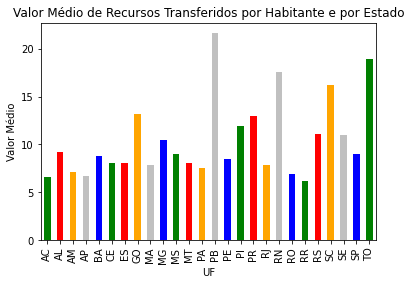

In [63]:
#dados = dados.reindex()
fig , ax = plt.subplots()
# ibge["SITUACAO"].value_counts().plot.bar(color=["blue","green", "black"])
dados.groupby("SIGLA_UF")["ValorMedioHab"].mean().plot.bar(color=['green','red','orange','silver','blue'])
ax.set_ylabel("Valor Médio")
ax.set_xlabel("UF")
ax.set_title("Valor Médio de Recursos Transferidos por Habitante e por Estado")
# ax.set_ylim(0,12)
plt.show()

In [64]:
# apresenta dados gerais dos valores médios recebidos por habitante pelo Município
dados.describe()


,TRANSFERIDO,SALDO_CONTA,PORCENT_EXECUTADO,COD_IBGE,POP_EST_2020,CAPITAL,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE,ValorMedioHab
count,4.639000e+03,4.232000e+03,3710.000000,4.639000e+03,4.639000e+03,4639.000000,4636.000000,4636.000000,4636.000000,4636.000000,4639.000000
mean,2.533427e+05,6.634221e+04,0.841640,3.180248e+06,3.590735e+04,0.001293,0.658108,0.799952,0.559134,0.640936,11.365320
std,4.621067e+05,1.462363e+05,0.236840,9.186624e+05,8.329194e+04,0.035944,0.073184,0.046155,0.093657,0.082067,31.208541
min,2.845551e+04,1.000000e-02,0.003374,1.100023e+06,7.760000e+02,0.000000,0.418000,0.672000,0.207000,0.400000,0.034829
25%,6.335718e+04,4.076225e+02,0.752868,2.508654e+06,6.752000e+03,0.000000,0.595000,0.766000,0.488000,0.567000,7.549166
50%,1.259156e+05,2.243762e+04,0.978619,3.126604e+06,1.450300e+04,0.000000,0.662000,0.805000,0.558000,0.646500,8.387725
75%,2.416072e+05,7.288370e+04,0.999756,4.106704e+06,3.088400e+04,0.000000,0.719000,0.837000,0.632000,0.709000,9.681256
max,8.085843e+06,3.126408e+06,1.000000,5.221858e+06,1.499641e+06,1.000000,0.862000,0.894000,0.825000,0.891000,1716.076664


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


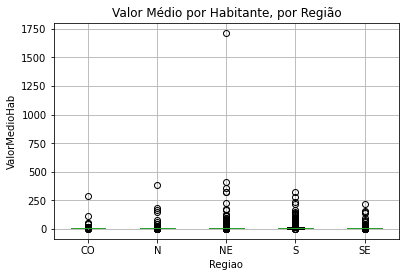

In [65]:
# São considerados apenas os municípios que tiveram seu plano de ação aprovado e receberam transferêsncias de recursos

fig, ax = plt.subplots()
dados.boxplot(column="ValorMedioHab", by="REGIAO", ax=ax)
ax.set_xlabel("Regiao")
ax.set_ylabel("ValorMedioHab")
ax.set_title("Valor Médio por Habitante, por Região")
plt.suptitle("")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


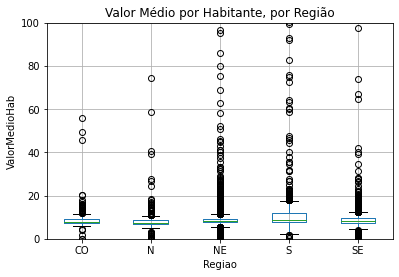

In [66]:
fig, ax = plt.subplots()
dados.boxplot(column="ValorMedioHab", by="REGIAO", ax=ax)
ax.set_xlabel("Regiao")
ax.set_ylabel("ValorMedioHab")
ax.set_title("Valor Médio por Habitante, por Região")
ax.set_ylim(0,100)
plt.suptitle("")
plt.show()

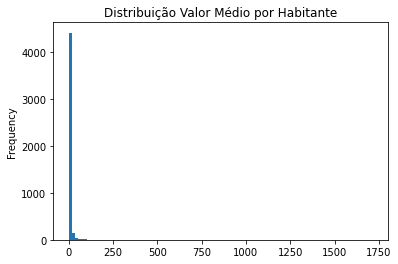

In [67]:
# Plotagem do Histograma do valor médio transferido por habitante
dados['ValorMedioHab'].plot(kind='hist', bins=100)
plt.title("Distribuição Valor Médio por Habitante")
plt.show()

In [68]:
# Apresentação da mediana dos valores médios transferidos por habitante
q5 = dados["ValorMedioHab"].quantile(.50)
q5

8.387725396191238

In [69]:
# Apresentação do decil superior dos valores médios transferidos por habitante
q9 = dados["ValorMedioHab"].quantile(.90)
q9

13.279942024829221

In [70]:
# Valor do centil 95% dos valores médios transferidos por habitante
q95 = dados["ValorMedioHab"].quantile(.95)
q95

17.213336817409342

Interpretação: ao se observar de modo amplo, não se percebe distorçoes do valor médio transferido por habitante aos Municípios, contudo, ao se categorizar cada vez mais os valores médios, começa-se a perceber uma quantidade razoável de outliers.
Essa quantidade de outliers pode ser devido a uma base de dados não totalmente confiável, com erros, ou indícios de favorecimento do Ente Federado.
Assim, afasta-se o critério de população do Município, isto é, um Município mais populoso NÃO implica em maior transferência de recursos.

2 - Panorama dos Municípios Cadastrados e Não Cadastrados no Programa


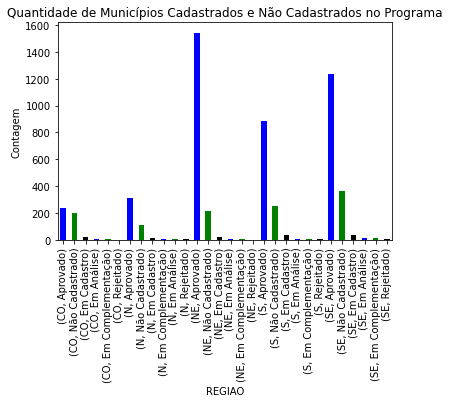

In [71]:

fig , ax = plt.subplots()
# ibge["SITUACAO"].value_counts().plot.bar(color=["blue","green", "black"])
ibge.groupby("REGIAO")["SITUACAO"].value_counts().plot.bar(color=["blue","green", "black"])
ax.set_ylabel("Contagem")
ax.set_xlabel("REGIAO")
ax.set_title("Quantidade de Municípios Cadastrados e Não Cadastrados no Programa")
# ax.set_ylim(0,12)
plt.show()



Observa-se que a Região Nordeste apresenta a maior proporção entre os Municípios cadastrados no Programa, enquanto que a Região Centro-Oeste é a que apresenta a menor proporção.

3 - Correlação entre o IDHM e a participação no Programa do Auxílio Emergencial.

Deseja-se investigar se os Municípios que apresentam maior IDHM estão mais propensos a se cadastrar no Programa para receber o Auxílio Emergencial da Cultura.

In [72]:
# 
# Verificar o IDH médio em relação à participação ou não no Programa
# idh = pd.to_numeric('IDHM')
# ibge["IDH"] = pd.to_numeric(ibge["IDHM"])
#ibge["IDH"] = ibge["IDHM"].astype(float, errors = 'raise')

# ibge.groupby(['SITUACAO'])['IDH'].mean()

# sns.barplot(x="SITUACAO", y="IDHM") #, hue='Regiao', data=dados, dodge=False, order=['AC','AM','AP','PA','RO','RR', 'TO','AL','BA','CE','MA','PB','PE','PI','RN','SE','DF','GO','MS','MT','PR','RS','SC','ES','MG','RJ','SP' ])
# plt.title("Relação entre Participação no Programa e IDH")
# plt.show()

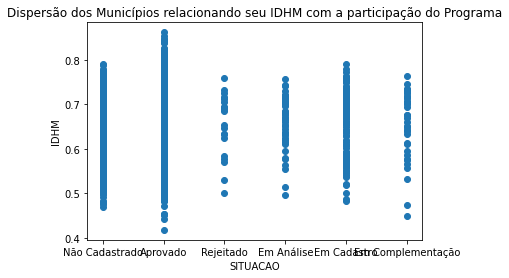

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


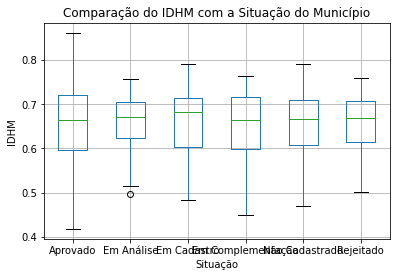

In [76]:
fig, ax = plt.subplots()
ax.scatter(ibge["SITUACAO"],ibge["IDHM"])
ax.set_xlabel('SITUACAO')
ax.set_ylabel('IDHM')
ax.set_title('Dispersão dos Municípios relacionando seu IDHM com a participação do Programa')
plt.show()

fig, ax = plt.subplots()
ibge.boxplot(column="IDHM", by="SITUACAO", ax=ax)
ax.set_xlabel("Situação")
ax.set_ylabel("IDHM")
ax.set_title("Comparação do IDHM com a Situação do Município")
#ax.set_ylim(0,100)
plt.suptitle("")
plt.show()

Interpretação dos gráficos: O IDH do Município não influencia na sua participação no Programa do Auxílio Emergencial da Cultura.

In [74]:
ibge['IDHM'].describe()


count    5565.000000
mean        0.659157
std         0.071997
min         0.418000
25%         0.599000
50%         0.665000
75%         0.718000
max         0.862000
Name: IDHM, dtype: float64

4 - Teste de Hipótese

In [78]:
dados.corr()

,TRANSFERIDO,SALDO_CONTA,PORCENT_EXECUTADO,COD_IBGE,POP_EST_2020,CAPITAL,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE,ValorMedioHab
TRANSFERIDO,1.000000,0.400403,-0.002440,0.021743,0.839115,-0.009034,0.259770,0.178399,0.272717,0.242446,0.152602
SALDO_CONTA,0.400403,1.000000,-0.484436,0.013082,0.319478,0.002022,0.100022,0.069777,0.104752,0.093842,0.014318
PORCENT_EXECUTADO,-0.002440,-0.484436,1.000000,-0.017501,0.001962,-0.013046,-0.027951,-0.011992,-0.031734,-0.027478,0.018551
COD_IBGE,0.021743,0.013082,-0.017501,1.000000,0.017562,-0.019276,0.627715,0.604121,0.516237,0.676592,0.002364
POP_EST_2020,0.839115,0.319478,0.001962,0.017562,1.000000,0.383274,0.270221,0.183064,0.281817,0.256632,-0.059548
CAPITAL,-0.009034,0.002022,-0.013046,-0.019276,0.383274,1.000000,0.053405,0.022788,0.057418,0.055742,-0.012771
IDHM,0.259770,0.100022,-0.027951,0.627715,0.270221,0.053405,1.000000,0.862487,0.953292,0.953045,-0.013999
IDHM_RENDA,0.178399,0.069777,-0.011992,0.604121,0.183064,0.022788,0.862487,1.000000,0.722035,0.844198,-0.007703
IDHM_EDUCACAO,0.272717,0.104752,-0.031734,0.516237,0.281817,0.057418,0.953292,0.722035,1.000000,0.832642,-0.009923
IDHM_LONGEVIDADE,0.242446,0.093842,-0.027478,0.676592,0.256632,0.055742,0.953045,0.844198,0.832642,1.000000,-0.021381


Hipótese: verificar se existe relação de dependência entre o IDHM e o Valor Médio repassado por habitante.

In [91]:
# cria função para realização dos testes de hipótese
def realiza_teste_quiquadrado(df, col1, col2, alpha=0.05):
  
  # obtem a tabela de contingência
  tabela_contingencia = pd.crosstab(dados[col1], dados[col2])
  
  # Realiza o teste qui-quadrado para verificar se existe relação de dependência entre os col1 and col2
  chi, p, dof, expected = stats.chi2_contingency(tabela_contingencia)

  # Verifica se o p_valor é menor que o nível de significância
  if p < alpha:
    print("As variáveis {} e {} são dependentes".format(col1, col2))
  else:
    print("As variáveis {} e {} não são dependentes".format(col1, col2))

  print()

  print("Valor de p encontrado")
  print(p)
  
  print("Tabela de Contingência:")
  print(tabela_contingencia)

In [92]:
realiza_teste_quiquadrado(dados, 'IDHM', 'ValorMedioHab')

As variáveis IDHM e ValorMedioHab não são dependentes

Valor de p encontrado
0.4244724556062183
Tabela de Contingência:
ValorMedioHab  0.034829     0.055597     ...  412.097145   1716.076664
IDHM                                     ...                          
0.418                    0            0  ...            0            0
0.443                    0            0  ...            0            0
0.452                    0            0  ...            0            0
0.453                    0            0  ...            0            0
0.471                    0            0  ...            0            0
...                    ...          ...  ...          ...          ...
0.837                    0            0  ...            0            0
0.840                    0            0  ...            0            0
0.845                    0            0  ...            0            0
0.854                    0            0  ...            0            0
0.862                    0  

Interpretação dos dados obtidos - Correlação entre IDHM e Valor Médio repassado ao Município
Não foi identificada correlação direta entre o IDHM e o Valor Médio repassado. A pergunta que a hipótese investigativa se propôs a responder é: "Municípios com maior IDHM se preocupam mais em manter suas estruturas culturais do que Municípios com menor IDHM? Por esse teste de hipótese a resposta é não. 

**CONCLUSÕES**

Este trabalho foi realizado com os seguintes objetivos:
- fixar os conceitos de Estatística Descritiva apresentados na disciplina;
- Utilizar a linguagem Python para fins de de análise e como uma preparação para a manipulação de grandes bases de dados;

Optou-se pelo uso de dados reais, os quais apresentam as mais diversas inconsistências, tais quais nomes inseridos de formas diferentes, CPFs no lugar de CNPJs, dentre outras. Fez-se previamente uma limpeza mínima nos dados, de forma a empregar os recursos de estatística e da linguagem Python para identificar essas inconsistências e subsidiariamente possíveis fraudes. 
